# Chapter 4: Logistic Regression 📊

## Learning Objectives 🎯
By the end of this chapter, you will be able to:
- Understand when to use logistic regression instead of linear regression
- Build models for classification problems (predicting categories)
- Apply logistic regression to identify handwritten digits
- Evaluate classification models using multiple metrics
- Interpret confusion matrixes and other evaluation tools

This chapter introduces you to your first classification algorithm - a fundamental tool for many real-world applications!

In [1]:
# Install missing packages
%pip install scikit-learn numpy matplotlib seaborn imbalanced-learn

# Suppress warnings about low memory
low_memory=False

# Import required packages
from sklearn import datasets
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import imblearn
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from imblearn.metrics import specificity_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

Note: you may need to restart the kernel to use updated packages.


## 4.1 Introduction & Motivation

## From Numbers to Categories: A New Challenge 🔄

So far, we've focused on predicting continuous values (like prices, temperatures, or scores). But what if we need to predict categories instead?

### Classification Problems in Real Life 🌍
- Spam detection: Is this email spam or not? (Yes/No)
- Medical diagnosis: Does this patient have a disease? (Yes/No)
- Image recognition: What digit is in this image? (0-9)
- Customer behavior: Will this customer buy our product? (Yes/No)

### Why Linear Regression Won't Work 🚫

Linear regression has a major problem with categories:
- It can predict any number (like 2.7 or -10.5)
- But categories need specific values (like 0 or 1)

**Example:** If we're predicting gender (0=male, 1=female) using linear regression:
- What does a prediction of 0.5 mean? 🤔
- Or -0.3? Or 1.7?

These values don't make sense for categories!

### Enter Logistic Regression 🦸‍♀️
Logistic regression solves this problem by:
1. Taking our inputs as usual
2. Running them through a special function
3. Giving outputs that represent probabilities (0-1)
4. Converting probabilities to specific categories

## 4.2 Problem Setting

### 🔢 The Handwritten Digit Recognition Challenge

In this notebook, we'll tackle a classic problem in machine learning: recognizing handwritten digits.

#### The Dataset 📚
We'll use the digits dataset from scikit-learn, which contains:
- Images of handwritten digits (0-9)
- Each image is 8x8 pixels (simplified version of real handwriting)
- Each pixel has a grayscale value (how dark/light it is)
- Each image has a label telling us which digit it represents

#### Why This Is a Classification Problem 🧩
- We're predicting which digit category (0-9) the image belongs to
- We have exactly 10 possible categories (multiclass classification)
- We need to decide which single category fits best

#### How We'll Approach This 🛣️
1. Load the images and their labels
2. Examine some sample images
3. Train a logistic regression model
4. Make predictions on new images
5. Evaluate how well our model performs

This is a perfect example of classification - we're sorting images into digit categories, not predicting continuous values!

In [2]:
digits = datasets.load_digits()
dir(digits)
# data
# Print to show there are 1797 images (8 by 8 images for a dimensionality of 64)
print("Image Data Shape" , digits.data.shape)
# Print to show there are 1797 labels (integers from 0–9)
print("Label Data Shape", digits.target.shape)

Image Data Shape (1797, 64)
Label Data Shape (1797,)


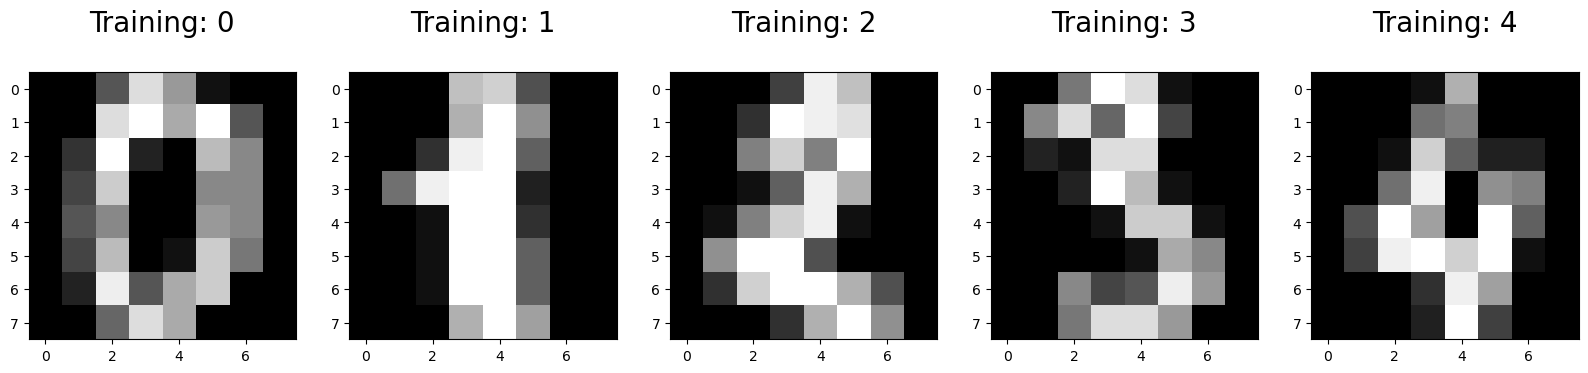

In [3]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
 plt.subplot(1, 5, index + 1)
 plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
 plt.title('Training: %i\n' % label, fontsize = 20)

## 4.3 Model

### 4.3.1 Model

### How Logistic Regression Works 🧠

Let's explore how logistic regression transforms a linear model into something suitable for classification.

#### Step 1: Start with Linear Regression ➡️
Remember how linear regression works:
- Take inputs (features)
- Multiply by weights
- Add a constant (bias)
- Get a result that can be any number (-∞ to +∞)

#### Step 2: Apply the Sigmoid Transformation 🔄
For classification, we add one crucial step:
- Take the linear regression output
- Pass it through a special function called the sigmoid function
- This converts any number into a value between 0 and 1
- The result represents a probability

The sigmoid function looks like an S-shaped curve:


![](https://miro.medium.com/max/1400/1*RqXFpiNGwdiKBWyLJc_E7g.png)

### Understanding the Sigmoid Function 📈

The sigmoid function is the magic that makes logistic regression work for classification. Here's how to interpret it:

#### Key Properties 🔑
- Always outputs values between 0 and 1
- S-shaped curve (smooth transition between extremes)
- Center point at 0.5 probability
- Steepest at the middle, flatter at extremes

#### How to Interpret the Output 🧐

In **binary classification** (two categories):
- Output close to 0: High confidence in category 0
- Output close to 1: High confidence in category 1
- Output around 0.5: Uncertainty (could go either way)

**Example:** Email Spam Detection
- Input: Email features (words, sender, etc.)
- Output: 0.92
- Interpretation: 92% chance this is spam
- Decision: Classify as spam (if threshold is 0.5)

#### For Multiple Categories 🔢
For problems with more than two categories (like our 10 digits):
- We create multiple binary models (one-vs-rest approach)
- Each model predicts probability for one digit
- We choose the category with highest probability

This approach lets us handle both simple yes/no problems and complex multi-category problems!

### 4.3.2 Model Estimation

To start off, we'll again divide our dataset into a test and a trainingset. This will allow us to evaluate the accuracy of our model later on:

In [4]:
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25, random_state=0)

Next, we'll fit our model on the data.

The first step is just making the model. This is done with several options. These refer to exactly which function we use to fit the data to, and which algorithm we use to fit our data to the chosen function. These options will be further elaborated on in the exercises.

In [5]:
logisticRegr = LogisticRegression(max_iter=10000)
logisticRegr.fit(x_train, y_train)

LogisticRegression(max_iter=10000)

Now we've made our classifier, we'll test if the predictions are any good by predicting the values of the test set.

In [6]:
# Returns a NumPy Array
# Predict for One Observation (image)
print(logisticRegr.predict(x_test[0].reshape(1,-1)))
print(logisticRegr.predict(x_test[0:10]))
predictions = logisticRegr.predict(x_test)
print(predictions)

[2]
[2 8 2 6 6 7 1 9 8 5]
[2 8 2 6 6 7 1 9 8 5 2 8 6 6 6 6 1 0 5 8 8 7 8 4 7 5 4 9 2 9 4 7 6 8 9 4 3
 1 0 1 8 6 7 7 1 0 7 6 2 1 9 6 7 9 0 0 9 1 6 3 0 2 3 4 1 9 2 6 9 1 8 3 5 1
 2 8 2 2 9 7 2 3 6 0 5 3 7 5 1 2 9 9 3 1 4 7 4 8 5 8 5 5 2 5 9 0 7 1 4 7 3
 4 8 9 7 9 8 2 1 5 2 5 8 4 1 7 0 6 1 5 5 9 9 5 9 9 5 7 5 6 2 8 6 9 6 1 5 1
 5 9 9 1 5 3 6 1 8 9 8 7 6 7 6 5 6 0 8 8 9 9 6 1 0 4 1 6 3 8 6 7 4 9 6 3 0
 3 3 3 0 7 7 5 7 8 0 7 1 9 6 4 5 0 1 4 6 4 3 3 0 9 5 9 2 8 4 2 1 6 8 9 2 4
 9 3 7 6 2 3 3 1 6 9 3 6 3 3 2 0 7 6 1 1 9 7 2 7 8 5 5 7 5 3 3 7 2 7 5 5 7
 0 9 1 6 5 9 7 4 3 8 0 3 6 4 6 3 2 6 8 8 8 4 6 7 5 2 4 5 3 2 4 6 9 4 5 4 3
 4 6 2 9 0 1 7 2 0 9 6 0 4 2 0 7 9 8 5 7 8 2 8 4 3 7 2 6 9 9 5 1 0 8 2 8 9
 5 6 2 2 7 2 1 5 1 6 4 5 0 9 4 1 1 7 0 8 9 0 5 4 3 8 8 6 5 3 4 4 4 8 8 7 0
 9 6 3 5 2 3 0 8 8 3 1 3 3 0 0 4 6 0 7 7 6 2 0 4 4 2 3 7 1 9 8 6 8 5 6 2 2
 3 1 7 7 8 0 3 3 2 1 5 5 9 1 3 7 0 0 3 0 4 5 8 9 3 4 3 1 8 9 8 3 6 3 1 6 2
 1 7 5 5 1 9]


As can be seen, we have made a NumPy Array in which the predictions are stored. This however doesn't really tell us anything about whether our predictions are correct. To check this, we'll move over to model evaluation.

## 4.4 Model Evaluation

### Evaluating Classification Models: Beyond Simple Accuracy ⚖️

When evaluating regression models, we used metrics like R² and MSE. For classification, we need different tools.

#### The Four Basic Outcomes 🧩

In any classification task, there are four possible outcomes for each prediction:

1. **True Positive (TP)** ✅
   - We predicted: "Yes, it's digit 7"
   - Reality: It is digit 7
   - Example: Correctly identifying a cancer patient

2. **True Negative (TN)** ✅
   - We predicted: "No, it's not digit 7"
   - Reality: It's not digit 7
   - Example: Correctly identifying a healthy patient

3. **False Positive (FP)** ❌
   - We predicted: "Yes, it's digit 7"
   - Reality: It's actually digit 1
   - Example: False alarm (diagnosing healthy person with disease)
   - Also called a "Type I error"

4. **False Negative (FN)** ❌
   - We predicted: "No, it's not digit 7"
   - Reality: It actually is digit 7
   - Example: Missing a diagnosis (failing to detect disease)
   - Also called a "Type II error"

These four outcomes are the building blocks for all our evaluation metrics!

### Accuracy

### Accuracy: The Most Intuitive Metric 🎯

Accuracy is the simplest and most intuitive evaluation metric for classification models.

#### What Is Accuracy? 📏
Accuracy measures the percentage of predictions that are correct:

$$\text{Accuracy} = \frac{\text{Number of Correct Predictions}}{\text{Total Number of Predictions}}$$

Using our TP, TN, FP, FN terminology:

$$\text{Accuracy} = \frac{\text{TP + TN}}{\text{TP + TN + FP + FN}}$$

#### Real-World Example 🌍
Imagine a digit recognition system for postal codes:
- System processes 1,000 digits
- Gets 950 correct, 50 wrong
- Accuracy = 950 ÷ 1,000 = 95%

#### When Accuracy Works Well ✅
- Balanced classes (similar numbers of each category)
- Equal importance of all types of errors

#### When Accuracy Can Be Misleading ⚠️
- Imbalanced classes (e.g., rare diseases, fraud detection)
- Different costs for different types of errors

For example: If 98% of emails are not spam, a model that predicts "never spam" would have 98% accuracy but be completely useless!

Let's calculate our model's accuracy:

In [7]:
test_pred = logisticRegr.predict(x_test)
accuracy = accuracy_score(y_test, test_pred)
print(accuracy)

0.9533333333333334


While this is the most intuitive way to calculate the accuracy, it does require and external function 'accuracy_score' and requires us to manually make some predictions. Instead we can calculate the accuracy of our logistic regression model in a way similar to calculating $R^2$ for linear regression:

In [8]:
score = logisticRegr.score(x_test, y_test)
print(score)

0.9533333333333334


##### Question 1: The code above will help us to calculate the score. Try to interpret the value we have gotten. Is our model any good?

### Precision

### Precision: When False Positives Matter 🔍

Precision focuses on the quality of positive predictions. It answers the question: "When we predict the positive class, how often are we right?"

#### What Is Precision? 📏
Precision measures the accuracy of positive predictions:

$$\text{Precision} = \frac{\text{TP}}{\text{TP + FP}}$$

#### Real-World Example 🌍
Imagine a spam filter:
- Predicted 100 emails as spam
- 90 were actually spam
- 10 were important emails incorrectly flagged
- Precision = 90 ÷ 100 = 90%

#### When Precision Is Critical ⚠️
- Email spam filters (don't want to miss important emails)
- Criminal investigations (don't want to accuse innocent people)
- Medical testing (don't want unnecessary treatments)

High precision means: "When we say it's positive, we're very confident!"

#### In Our Digit Recognition:
For each digit (0-9), precision tells us: "When we predict this is a '7', how often is it actually a '7'?"

Let's examine the precision for each digit:

In [9]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.91      0.93      0.92        43
           2       0.98      0.93      0.95        44
           3       0.91      0.96      0.93        45
           4       0.97      0.97      0.97        38
           5       0.98      0.96      0.97        48
           6       1.00      0.98      0.99        52
           7       0.98      0.96      0.97        48
           8       0.91      0.90      0.91        48
           9       0.90      0.96      0.93        47

    accuracy                           0.95       450
   macro avg       0.95      0.95      0.95       450
weighted avg       0.95      0.95      0.95       450



You can also calculate the global precision using the code below:

In [10]:
print(precision_score(y_test, predictions, average='weighted'))

0.9541907627439542


##### Question 2: Does the precision of our model diminish its accuracy value or not? Explain based on the results we've become.

### Recall and f1-score

### Recall and Specificity: Different Sides of the Same Coin 🪙

While precision focuses on quality of positive predictions, recall and specificity focus on coverage - how well we catch all instances of each class.

#### What Is Recall? 🔄
Recall (also called Sensitivity or True Positive Rate) measures how good we are at finding all positive cases:

$$\text{Recall} = \frac{\text{TP}}{\text{TP + FN}}$$

#### Real-World Example of Recall 🏥
In medical diagnosis of a serious disease:
- 100 patients actually have the disease
- Our test correctly identifies 95 of them
- We miss 5 cases
- Recall = 95 ÷ 100 = 95%

#### What Is Specificity? 🛡️
Specificity (also called True Negative Rate) measures how good we are at avoiding false alarms:

$$\text{Specificity} = \frac{\text{TN}}{\text{TN + FP}}$$

#### Real-World Example of Specificity 👮
In airport security screening:
- 1,000 passengers don't have prohibited items
- System correctly clears 950 without further search
- 50 get unnecessarily searched
- Specificity = 950 ÷ 1,000 = 95%

#### When to Focus on Each 🎯
- **High Recall Needed**: Cancer screening, fraud detection, terrorist identification
  (Missing a true case is very costly)
  
- **High Specificity Needed**: Early screening tests, spam filtering
  (False alarms are costly or annoying)

#### F1 Score: Balancing Precision and Recall 🏆
The F1 Score is a harmonic mean of precision and recall - a single metric to balance both concerns:

$$\text{F1 Score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}} = \frac{2 \times \text{TP}}{2 \times \text{TP + FP + FN}}$$

Let's calculate these metrics:

In [11]:
print(recall_score(y_test, predictions, average='weighted'))

0.9533333333333334


The sister of recall is called $Specificity$, or the $True$ $Negative$ $Rate$ (TNR). This metric calculates how well the model identifies negative instances. This is useful when you want a model where there are few False Positives. For example, when detecting fraud you do not want to falsely accuse someone. It is more more important to correctly identify people who do commit fraud, than those who do not. Have a look at the formula.

$$Specificity = \frac{\text{TN}}{\text{TN + FP}}$$

Once again, you can easily calculate the global Specificity score in python as follows:

In [12]:
print(specificity_score(y_test, predictions, average='weighted'))

0.9947395539504216


Lastly we have the $F1 Score$. This score brings a balance between Recall and Specificity, taking into account unbalanced classes. The formula gets a bit more complicated as follows:

$$F1 Score = 2 * \frac{\text{Precision x Recall}}{\text{Precision + Recall}}$$

When writing this out and simplifying it, we get the following formula:

$$F1 Score = 2 * \frac{\text{TP}}{\text{TP + FP + FN}}$$

Once again, you can easily calculate the global F1 Score in python as follows:

In [13]:
print(f1_score(y_test, predictions, average='weighted'))

0.9535186251861827


### Confusion Matrix

### The Confusion Matrix: Seeing the Full Picture 📊

Sometimes numbers alone don't tell the whole story. The confusion matrix gives us a visual representation of our model's performance.

#### What Is a Confusion Matrix? 🧩
- A table showing predicted vs. actual class counts
- Rows represent actual classes
- Columns represent predicted classes
- Perfect prediction = numbers only on the diagonal

#### Reading a Confusion Matrix 📖
For binary classification (e.g., disease/no disease):
```
                 | Predicted: NO | Predicted: YES
-----------------+--------------+---------------
Actual: NO       |      TN      |      FP
-----------------+--------------+---------------
Actual: YES      |      FN      |      TP
```

#### For Multiple Classes 🔢
With 10 digits (0-9), we get a 10×10 matrix:
- Diagonal elements = correct predictions
- Off-diagonal elements = mistakes
- Row i, column j = instances of digit i predicted as digit j

#### Benefits of Confusion Matrices 🌟
1. See which classes get confused with each other
2. Identify specific weaknesses in your model
3. Discover patterns in misclassifications
4. Present results visually to non-technical audiences

Let's generate and visualize our confusion matrix:

In [14]:
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[37  0  0  0  0  0  0  0  0  0]
 [ 0 40  0  0  0  0  0  0  2  1]
 [ 0  0 41  3  0  0  0  0  0  0]
 [ 0  0  0 43  0  0  0  0  1  1]
 [ 0  0  0  0 37  0  0  1  0  0]
 [ 0  0  0  0  0 46  0  0  0  2]
 [ 0  1  0  0  0  0 51  0  0  0]
 [ 0  0  0  1  1  0  0 46  0  0]
 [ 0  3  1  0  0  0  0  0 43  1]
 [ 0  0  0  0  0  1  0  0  1 45]]


Though perfectly readable, this is not the type of "intuitive graphical representation" you might want to present to illustrate your conclusions. Luckily, this is very handy to mark-up:

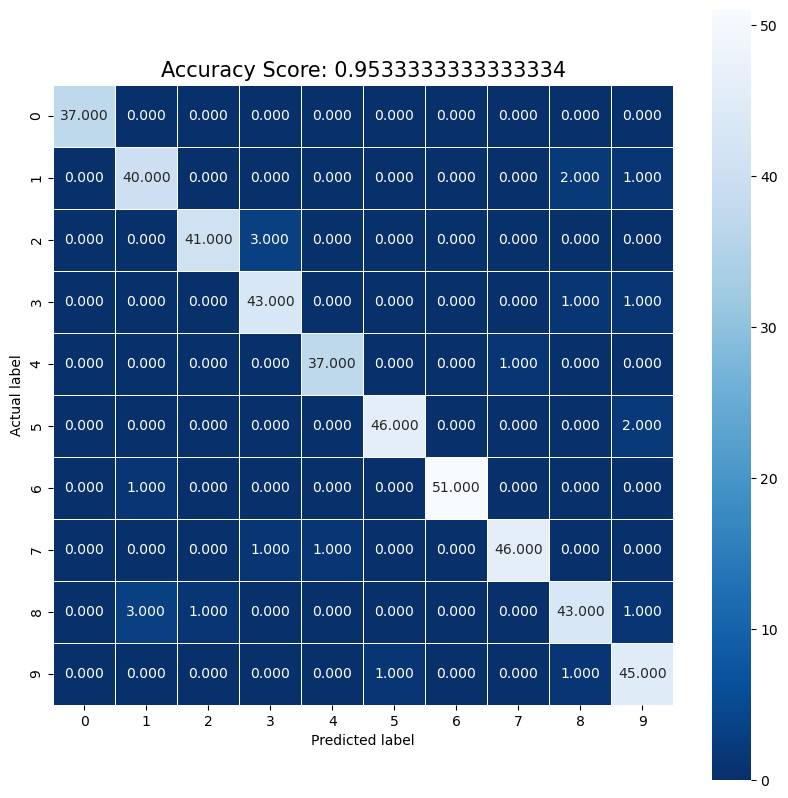

In [15]:
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

##### Question 3: for which metric we discussed above, is the Confusion Matrix a graphical representation? Why?

### Additional Illustrations

Additional illustrations do exist (such as the ROC), but these are not always interesting nor possible for multiclass analysis. It might however be interesting to think about one illustration that will convince your audience you do know what you're talking about. For this, make question 4.

##### Question 4: Go back and take a look at section 3.2, and the illustration we provided there. Try and adapt the code to represent 10 data points, and also include the predicted value.

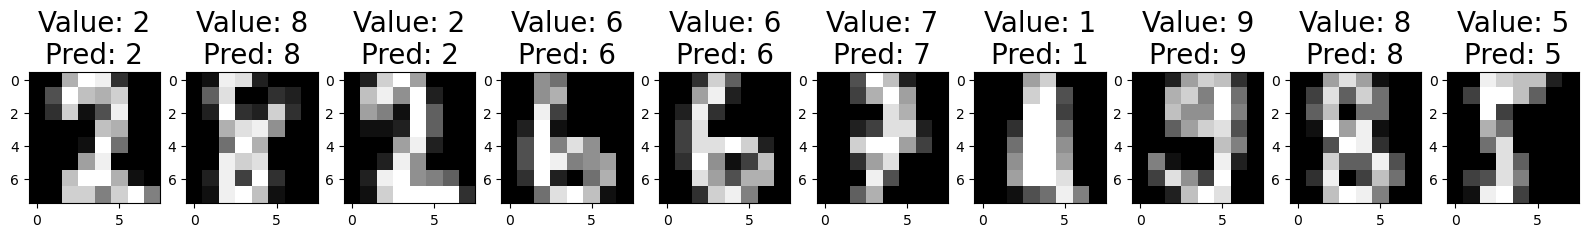

In [16]:
plt.figure(figsize=(20,4))
predictions = logisticRegr.predict(x_test[0:10])
for index, (image, label) in enumerate(zip(x_test[0:10], y_test[0:10])):
    plt.subplot(1, 10, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    #prediction = logisticRegr.predict(label.reshape(1,-1))
    plt.title(f'Value: {label}\nPred: {predictions[index]}', fontsize = 20)

## 4.5 Questions

##### Question 1: See section 4.4

##### Question 2: See section 4.4

##### Question 3: See section 4.4

##### Question 4: 
Go back to section 3.3.2 and remember that we could include different options into our model. In this question we'll examine different "solvers" and their efficiency. A solver is an algorithm used to estimate and fit our desired functions. The parameter `max_iter` sets the maximum number of iterations the algorithm may perform (similar to loops). 

Compare the precision and accuracy for the logistic regression model using different algorithms (lbfgs, saga, newton-cg) and different levels of max_iteration. Determine which algorithm achieves the desired level of accuracy and precision most efficiently (with the fewest number of iterations).

In [18]:
solvers = ['lbfgs', 'saga', 'newton-cg']
iterations = [10, 100, 1000, 10000, 100000]

for solver in solvers:
    print ('Solving with', solver)
    for max_iter in iterations:
        print ('\tMax iterations', max_iter)
        logisticRegr = LogisticRegression(max_iter=max_iter, solver=solver)
        logisticRegr.fit(x_train, y_train)
        score = logisticRegr.score(x_test, y_test)
        print('\t\t', score)

Solving with lbfgs
	Max iterations 10
		 0.9577777777777777
	Max iterations 100
		 0.9511111111111111
	Max iterations 1000
		 0.9533333333333334
	Max iterations 10000


c:\Users\billo\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\billo\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

		 0.9533333333333334
	Max iterations 100000
		 0.9533333333333334
Solving with saga
	Max iterations 10
		 0.9666666666666667
	Max iterations 100


c:\Users\billo\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\billo\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


		 0.9644444444444444
	Max iterations 1000


c:\Users\billo\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


		 0.9555555555555556
	Max iterations 10000
		 0.9555555555555556
	Max iterations 100000
		 0.9555555555555556
Solving with newton-cg
	Max iterations 10
		 0.9533333333333334
	Max iterations 100


c:\Users\billo\anaconda3\Lib\site-packages\sklearn\utils\optimize.py:319: ConvergenceWarning: newton-cg failed to converge at loss = 0.010068488207018233. Increase the number of iterations.
  warnings.warn(


		 0.9555555555555556
	Max iterations 1000
		 0.9555555555555556
	Max iterations 10000
		 0.9555555555555556
	Max iterations 100000
		 0.9555555555555556
